In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('placement.csv')

In [50]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


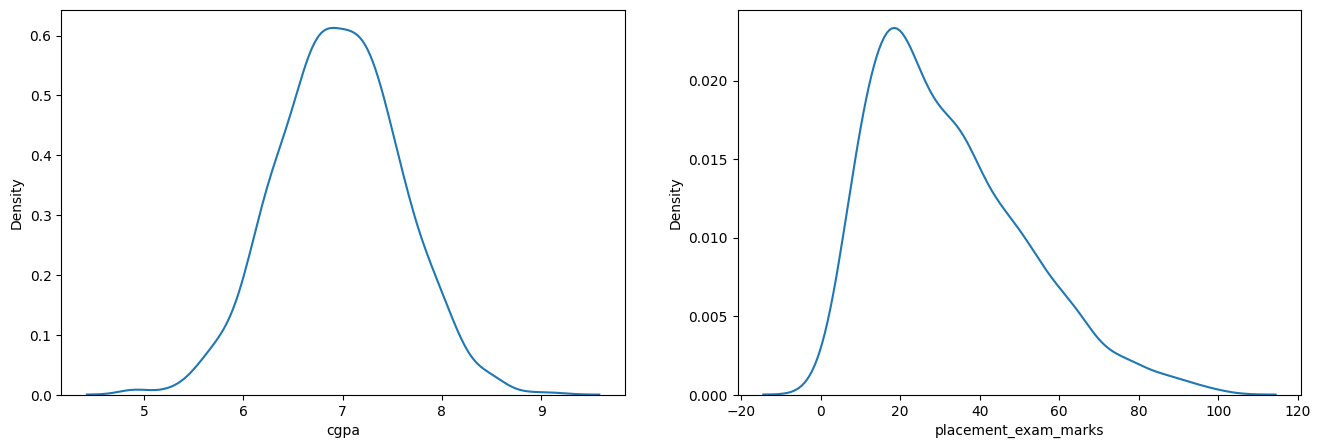

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

In [9]:
df['placement_exam_marks'].skew()


0.8356419499466834

In [10]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

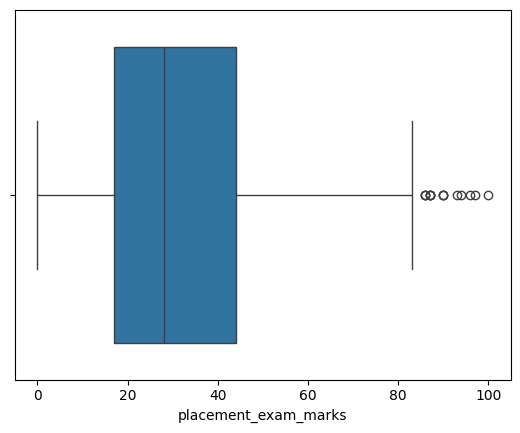

In [12]:
sns.boxplot(x = df['placement_exam_marks'])

In [20]:
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

In [29]:
Q1

17.0

In [22]:
iqr = Q3 - Q1

In [24]:
lower = Q1 - (1.5*iqr)
upper = Q3 + (1.5*iqr)

In [45]:
lower

-23.5

# trimming

In [61]:
df [ (df['placement_exam_marks']>upper) ]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [52]:
new_df = df[(df['placement_exam_marks']<upper) ] 

In [53]:
new_df.sample(5)

,cgpa,placement_exam_marks,placed
901,7.10,50.0,1
761,8.02,6.0,0
370,5.70,79.0,1
467,6.65,7.0,0
951,7.52,48.0,1


In [54]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,985.000000,985.000000,985.00000
mean,6.961594,31.339086,0.48934
std,0.614734,17.857633,0.50014
min,4.890000,0.000000,0.00000
25%,6.550000,17.000000,0.00000
50%,6.960000,28.000000,0.00000
75%,7.370000,43.000000,1.00000
max,9.120000,83.000000,1.00000


In [55]:
new_df.shape

(985, 3)

#  Capping


In [56]:
df['placement_exam_marks'] = np.where(df['placement_exam_marks']>upper,upper,df['placement_exam_marks'])

In [57]:
df.shape


(1000, 3)

In [58]:
df['placement_exam_marks'].describe()


count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64